# HiCi Ltd EU Food Export Analysis

**Author:** Favour Ezeofor  
**Role:** Data Analyst  
**Project:** EU Food Safety Risk Analysis  
**Date:** 1st October 2025  

---

## Project Overview
HiCi Ltd is a local food export company expanding to the European Union (EU).  
The company faces risks of product rejection and consignment detention due to EU food safety regulations.  

This project aims to analyze raw data from the EU Food Safety Standard Agency to determine:

1. The EU member country reporting the highest number of food rejections.  
2. The most rejected food categories.  
3. The countries of origin of the most rejected foods.  
4. The actions most frequently taken against rejected foods.  
5. The countries exporting the most food to the EU.  

---

## Objectives
- Identify high-risk food products for HiCi Ltd.  
- Provide actionable insights to guide management decisions.  
- Visualize trends and risks using Python (Pandas, Matplotlib, Seaborn).  

---

## Dataset Description
The dataset contains the following columns:  

- `Product category` – Type of food
- `Year` – Date of notification  
- `Notification type` – Information or alert  
- `Risk` – Risk level (if specified)  
- `Notified by` – EU member country reporting the issue  
- `Action taken` – Action applied to the food product  
- `Distribution status` – Where the product can be distributed  
- `Risk decision` – Severity of the risk  
- `Country of origin` – Country that exported the product
    


In [14]:
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns             


In [18]:
# Defining the column names for the dataset to ensure correct headers after skipping messy rows

columns = [
    "Product category", "Year", "Notification type", "Risk",
    "Notified by", "Action taken", "Distribution status", "Risk decision", "Country of origin"
]

#loading csv file

df = pd.read_csv(
    r"C:\Users\HP\Downloads\HiCi - Africa Food Export.xlsx - Food export - 1.csv",
    skiprows=4,  # skip the first 4 messy rows
    usecols=range(5, 14),  # take only relevant columns
    names=columns
)

df.reset_index(drop=True, inplace=True)


In [19]:
df.head()

,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
1,meat and meat products (other than poultry),5/8/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
2,meat and meat products (other than poultry),24/8/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
3,meat and meat products (other than poultry),24/9/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
4,meat and meat products (other than poultry),11/6/2001,information,NaN,Norway,import not authorised,NaN,undecided,Botswana


In [20]:
# Dropping the first that contains duplicate headers, then assign proper column names
df = df.drop(0).reset_index(drop=True)
df.columns = [
    "Product category", "Year", "Notification type", "Risk",
    "Notified by", "Action taken", "Distribution status", "Risk decision", "Country of origin"
]


In [21]:
df.head()

,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,meat and meat products (other than poultry),5/8/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
1,meat and meat products (other than poultry),24/8/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
2,meat and meat products (other than poultry),24/9/1999,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
3,meat and meat products (other than poultry),11/6/2001,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
4,meat and meat products (other than poultry),21/6/2001,information,NaN,Norway,import not authorised,NaN,undecided,Botswana


In [60]:
# Removing any rows where 'Product category' still has the header text (if any)
df = df[df['Product category'] != 'Product category']
df.reset_index(drop=True, inplace=True)

In [61]:
df.head()
df.shape


(163, 9)

In [30]:
# Convert 'Year' column to datetime
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')


In [31]:
df['Year'].head()
df['Year'].isnull().sum()


np.int64(321)

In [32]:
# Show rows where 'Year' could not be converted
df[df['Year'].isnull()]


,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
1,meat and meat products (other than poultry),NaT,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
2,meat and meat products (other than poultry),NaT,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
4,meat and meat products (other than poultry),NaT,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
5,meat and meat products (other than poultry),NaT,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
6,meat and meat products (other than poultry),NaT,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
...,...,...,...,...,...,...,...,...,...
508,"nuts, nut products and seeds",NaT,border rejection,border control - consignment detained,Netherlands,official detention,product not (yet) placed on the market,serious,Uganda
509,"nuts, nut products and seeds",NaT,border rejection,border control - consignment detained,Netherlands,physical/chemical treatment,product not (yet) placed on the market,serious,Uganda
510,"nuts, nut products and seeds",NaT,border rejection,border control - consignment detained,Netherlands,physical/chemical treatment,product not (yet) placed on the market,serious,Uganda
511,"nuts, nut products and seeds",NaT,border rejection,border control - consignment detained,Germany,re-dispatch,product not (yet) placed on the market,serious,Uganda


In [33]:
# Remove rows where 'Year' is NaT
df = df.dropna(subset=['Year'])
df.reset_index(drop=True, inplace=True)
df.shape


(192, 9)

In [34]:
# Checking how many missing values remain in each column
df.isnull().sum()


Product category        0
Year                    0
Notification type       0
Risk                   19
Notified by             0
Action taken           12
Distribution status    24
Risk decision           0
Country of origin       0
dtype: int64

In [36]:
# Fill missing categorical values with 'Unknown'
df.loc[:, 'Risk'] = df['Risk'].fillna('Unknown')
df.loc[:, 'Action taken'] = df['Action taken'].fillna('Unknown')
df.loc[:, 'Distribution status'] = df['Distribution status'].fillna('Unknown')
df.isnull().sum()


Product category       0
Year                   0
Notification type      0
Risk                   0
Notified by            0
Action taken           0
Distribution status    0
Risk decision          0
Country of origin      0
dtype: int64

In [37]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product category     192 non-null    object        
 1   Year                 192 non-null    datetime64[ns]
 2   Notification type    192 non-null    object        
 3   Risk                 192 non-null    object        
 4   Notified by          192 non-null    object        
 5   Action taken         192 non-null    object        
 6   Distribution status  192 non-null    object        
 7   Risk decision        192 non-null    object        
 8   Country of origin    192 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 13.6+ KB


,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,meat and meat products (other than poultry),1999-05-08,information,Unknown,Norway,import not authorised,Unknown,undecided,Botswana
1,meat and meat products (other than poultry),2001-11-06,information,Unknown,Norway,import not authorised,Unknown,undecided,Botswana
2,meat and meat products (other than poultry),2003-05-03,information,Unknown,Norway,import not authorised,Unknown,undecided,Botswana
3,meat and meat products (other than poultry),2004-04-11,information,official control on the market,Norway,re-dispatch,distribution restricted to notifying country,undecided,Botswana
4,meat and meat products (other than poultry),2004-08-11,information,official control on the market,Norway,prohibition to trade - sales ban,distribution restricted to notifying country,undecided,Botswana


In [39]:
# Standardize categorical columns: strip spaces and convert to lowercase
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip().str.lower()
df.head()

,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,meat and meat products (other than poultry),1999-05-08,information,unknown,norway,import not authorised,unknown,undecided,botswana
1,meat and meat products (other than poultry),2001-11-06,information,unknown,norway,import not authorised,unknown,undecided,botswana
2,meat and meat products (other than poultry),2003-05-03,information,unknown,norway,import not authorised,unknown,undecided,botswana
3,meat and meat products (other than poultry),2004-04-11,information,official control on the market,norway,re-dispatch,distribution restricted to notifying country,undecided,botswana
4,meat and meat products (other than poultry),2004-08-11,information,official control on the market,norway,prohibition to trade - sales ban,distribution restricted to notifying country,undecided,botswana


In [40]:
# Checking for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
duplicate_rows


Number of duplicate rows: 29


,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
35,fish and fish products,1999-01-02,information,unknown,germany,seizure,unknown,undecided,kenya
44,meat and meat products (other than poultry),2002-05-06,information,unknown,norway,import not authorised,unknown,undecided,namibia
45,meat and meat products (other than poultry),2002-05-06,information,unknown,norway,import not authorised,unknown,undecided,namibia
48,meat and meat products (other than poultry),2002-09-08,information,unknown,norway,prohibition to trade - sales ban,unknown,undecided,namibia
49,meat and meat products (other than poultry),2002-09-08,information,unknown,norway,prohibition to trade - sales ban,unknown,undecided,namibia
56,"nuts, nut products and seeds",2017-07-04,border rejection,border control - consignment detained,greece,re-dispatch,product not (yet) placed on the market,serious,nigeria
57,"nuts, nut products and seeds",2017-07-04,border rejection,border control - consignment detained,greece,re-dispatch,product not (yet) placed on the market,serious,nigeria
77,"nuts, nut products and seeds",2019-07-05,border rejection,border control - consignment detained,greece,physical/chemical treatment,product not (yet) placed on the market,serious,nigeria
101,"nuts, nut products and seeds",2018-02-03,border rejection,border control - consignment detained,greece,import not authorised,product not (yet) placed on the market,serious,sudan
107,"nuts, nut products and seeds",2018-12-04,border rejection,border control - consignment detained,poland,re-dispatch,product not (yet) placed on the market,serious,sudan


In [41]:
# Removing duplicate rows
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print(f"New shape after removing duplicates: {df.shape}")


New shape after removing duplicates: (163, 9)


In [42]:
# Check data types of all columns
df.dtypes


Product category               object
Year                   datetime64[ns]
Notification type              object
Risk                           object
Notified by                    object
Action taken                   object
Distribution status            object
Risk decision                  object
Country of origin              object
dtype: object

In [45]:
# Standardize all object columns to lowercase
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()
df.head()

,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,meat and meat products (other than poultry),1999-05-08,information,unknown,norway,import not authorised,unknown,undecided,botswana
1,meat and meat products (other than poultry),2001-11-06,information,unknown,norway,import not authorised,unknown,undecided,botswana
2,meat and meat products (other than poultry),2003-05-03,information,unknown,norway,import not authorised,unknown,undecided,botswana
3,meat and meat products (other than poultry),2004-04-11,information,official control on the market,norway,re-dispatch,distribution restricted to notifying country,undecided,botswana
4,meat and meat products (other than poultry),2004-08-11,information,official control on the market,norway,prohibition to trade - sales ban,distribution restricted to notifying country,undecided,botswana


In [47]:
# Get value counts for each categorical column
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-"*50)



Column: Product category
Product category
nuts, nut products and seeds                                                                108
meat and meat products (other than poultry)                                                  13
fish and fish products                                                                       13
herbs and spices                                                                             11
molluscs and products thereof - (obsolete)                                                    6
dietetic foods, food supplements, fortified foods                                             2
fruits and vegetables                                                                         2
cereals and bakery products                                                                   1
cephalopods and products thereof                                                              1
gastropods                                                                                    

In [48]:
# Checking min, max, and unique values in the Year column
print("Year column info:")
print(f"Min year: {df['Year'].min()}")
print(f"Max year: {df['Year'].max()}")
print(f"Unique years count: {df['Year'].nunique()}")
print(f"First 10 unique years: {df['Year'].sort_values().unique()[:10]}")


Year column info:
Min year: 1999-01-02 00:00:00
Max year: 2019-12-11 00:00:00
Unique years count: 138
First 10 unique years: <DatetimeArray>
['1999-01-02 00:00:00', '1999-02-09 00:00:00', '1999-04-05 00:00:00',
 '1999-05-08 00:00:00', '1999-10-11 00:00:00', '2000-05-07 00:00:00',
 '2000-07-04 00:00:00', '2000-12-10 00:00:00', '2001-09-03 00:00:00',
 '2001-11-06 00:00:00']
Length: 10, dtype: datetime64[ns]


In [49]:
# Standardize all object columns to lowercase and strip spaces
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()

df.head()


,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,meat and meat products (other than poultry),1999-05-08,information,unknown,norway,import not authorised,unknown,undecided,botswana
1,meat and meat products (other than poultry),2001-11-06,information,unknown,norway,import not authorised,unknown,undecided,botswana
2,meat and meat products (other than poultry),2003-05-03,information,unknown,norway,import not authorised,unknown,undecided,botswana
3,meat and meat products (other than poultry),2004-04-11,information,official control on the market,norway,re-dispatch,distribution restricted to notifying country,undecided,botswana
4,meat and meat products (other than poultry),2004-08-11,information,official control on the market,norway,prohibition to trade - sales ban,distribution restricted to notifying country,undecided,botswana


In [50]:
# Checking for duplicate rows
duplicates = df.duplicated().sum()
duplicates


np.int64(0)

In [51]:
# Summary statistics for numerical columns
df.describe(include='all')


,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
count,163,163,163,163,163,163,163,163,163
unique,15,NaN,5,6,12,20,9,3,18
top,"nuts, nut products and seeds",NaN,border rejection,border control - consignment detained,greece,import not authorised,product not (yet) placed on the market,serious,sudan
freq,108,NaN,114,121,75,38,107,118,60
mean,NaN,2015-02-05 16:55:57.055214848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1999-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2012-01-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2018-05-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2019-03-06 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,2019-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
# Counting of each category in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("-"*50)


Column: Product category
Product category
nuts, nut products and seeds                                                                108
meat and meat products (other than poultry)                                                  13
fish and fish products                                                                       13
herbs and spices                                                                             11
molluscs and products thereof - (obsolete)                                                    6
dietetic foods, food supplements, fortified foods                                             2
fruits and vegetables                                                                         2
cereals and bakery products                                                                   1
cephalopods and products thereof                                                              1
gastropods                                                                                    

In [53]:
# Year column analysis
print("Year column info:")
print(f"Min year: {df['Year'].min()}")
print(f"Max year: {df['Year'].max()}")
print(f"Unique years count: {df['Year'].nunique()}")
print("First 10 unique years:", df['Year'].sort_values().unique()[:10])


Year column info:
Min year: 1999-01-02 00:00:00
Max year: 2019-12-11 00:00:00
Unique years count: 138
First 10 unique years: <DatetimeArray>
['1999-01-02 00:00:00', '1999-02-09 00:00:00', '1999-04-05 00:00:00',
 '1999-05-08 00:00:00', '1999-10-11 00:00:00', '2000-05-07 00:00:00',
 '2000-07-04 00:00:00', '2000-12-10 00:00:00', '2001-09-03 00:00:00',
 '2001-11-06 00:00:00']
Length: 10, dtype: datetime64[ns]


In [54]:
# Checking for any remaining duplicates
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [56]:
# Standardize text data: lowercase and strip spaces for all object columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower().str.strip()
df.head()

,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,meat and meat products (other than poultry),1999-05-08,information,unknown,norway,import not authorised,unknown,undecided,botswana
1,meat and meat products (other than poultry),2001-11-06,information,unknown,norway,import not authorised,unknown,undecided,botswana
2,meat and meat products (other than poultry),2003-05-03,information,unknown,norway,import not authorised,unknown,undecided,botswana
3,meat and meat products (other than poultry),2004-04-11,information,official control on the market,norway,re-dispatch,distribution restricted to notifying country,undecided,botswana
4,meat and meat products (other than poultry),2004-08-11,information,official control on the market,norway,prohibition to trade - sales ban,distribution restricted to notifying country,undecided,botswana


In [62]:
# Check missing values after cleaning
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Product category       0
Year                   0
Notification type      0
Risk                   0
Notified by            0
Action taken           0
Distribution status    0
Risk decision          0
Country of origin      0
dtype: int64


In [63]:
# Verifying data types and cleaned dataset
print("\nData types after cleaning:\n", df.dtypes)
print("\nDataset shape:", df.shape)
df.head()


Data types after cleaning:
 Product category               object
Year                   datetime64[ns]
Notification type              object
Risk                           object
Notified by                    object
Action taken                   object
Distribution status            object
Risk decision                  object
Country of origin              object
dtype: object

Dataset shape: (163, 9)


,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,meat and meat products (other than poultry),1999-05-08,information,unknown,norway,import not authorised,unknown,undecided,botswana
1,meat and meat products (other than poultry),2001-11-06,information,unknown,norway,import not authorised,unknown,undecided,botswana
2,meat and meat products (other than poultry),2003-05-03,information,unknown,norway,import not authorised,unknown,undecided,botswana
3,meat and meat products (other than poultry),2004-04-11,information,official control on the market,norway,re-dispatch,distribution restricted to notifying country,undecided,botswana
4,meat and meat products (other than poultry),2004-08-11,information,official control on the market,norway,prohibition to trade - sales ban,distribution restricted to notifying country,undecided,botswana


In [66]:
# Counting notifications per year to see trends over time
notifications_per_year = df.groupby(df['Year'].dt.year)['Notification type'].count()
print(notifications_per_year)


Year
1999     5
2000     3
2001     2
2002     3
2003     4
2004     6
2005     5
2006     1
2007     1
2008     1
2009     6
2010     4
2013     2
2014     2
2015     3
2016     4
2017    12
2018    43
2019    56
Name: Notification type, dtype: int64


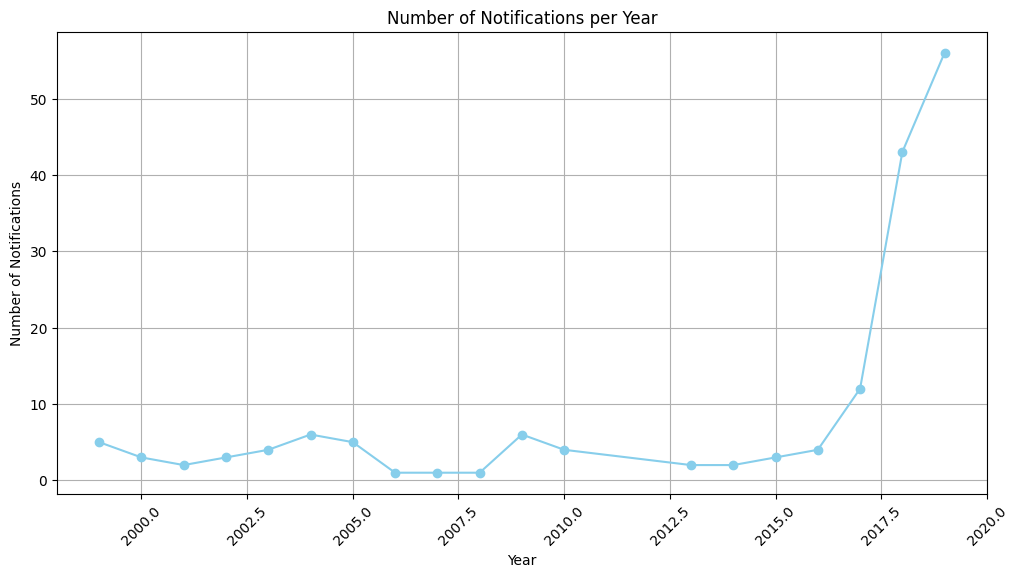

In [85]:
# Visualizing notifications per year using a line chart

plt.figure(figsize=(12,6))
notifications_per_year.plot(kind='line', marker='o', color='skyblue')
plt.title('Number of Notifications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Notifications')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


In [68]:
# Counting the number of notifications for each risk type
risk_counts = df['Risk'].value_counts()

# Displaying the counts
print(risk_counts)


Risk
border control - consignment detained         121
official control on the market                 18
unknown                                        14
border control - consignment released           8
border control - consignment under customs      1
company's own check                             1
Name: count, dtype: int64


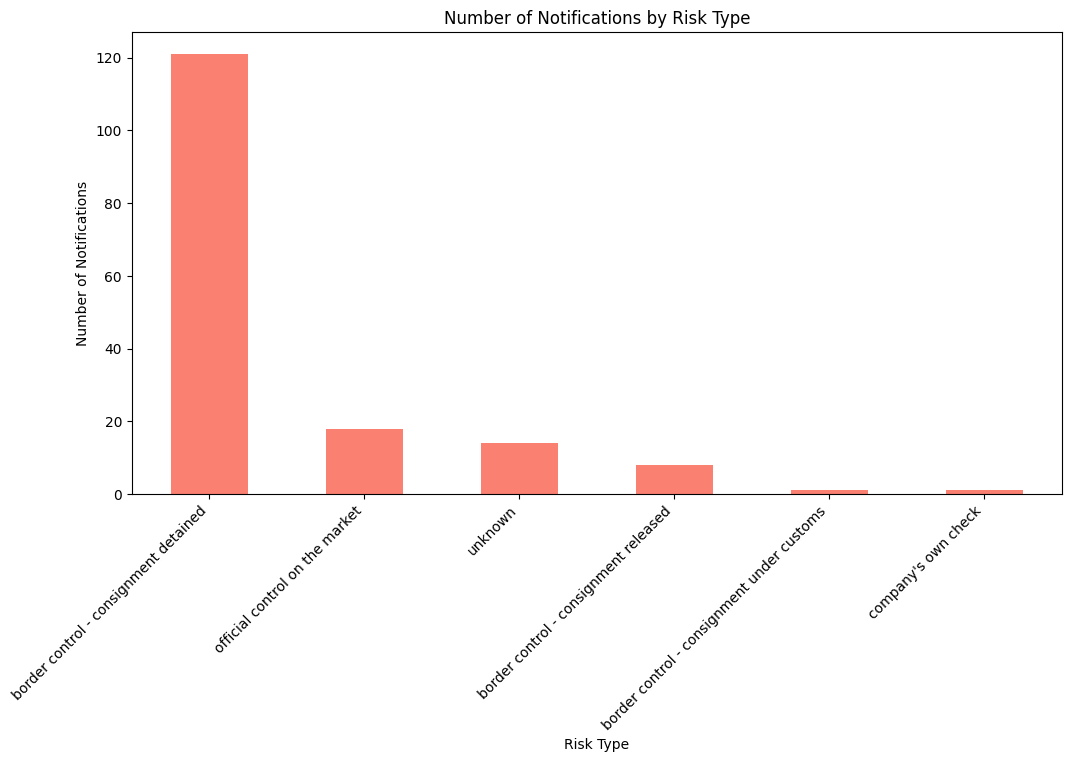

In [69]:
# Visualizing notifications by Risk type using a bar chart
plt.figure(figsize=(12,6))
risk_counts.plot(kind='bar', color='salmon')
plt.title('Number of Notifications by Risk Type')
plt.xlabel('Risk Type')
plt.ylabel('Number of Notifications')
plt.xticks(rotation=45, ha='right')
plt.show()


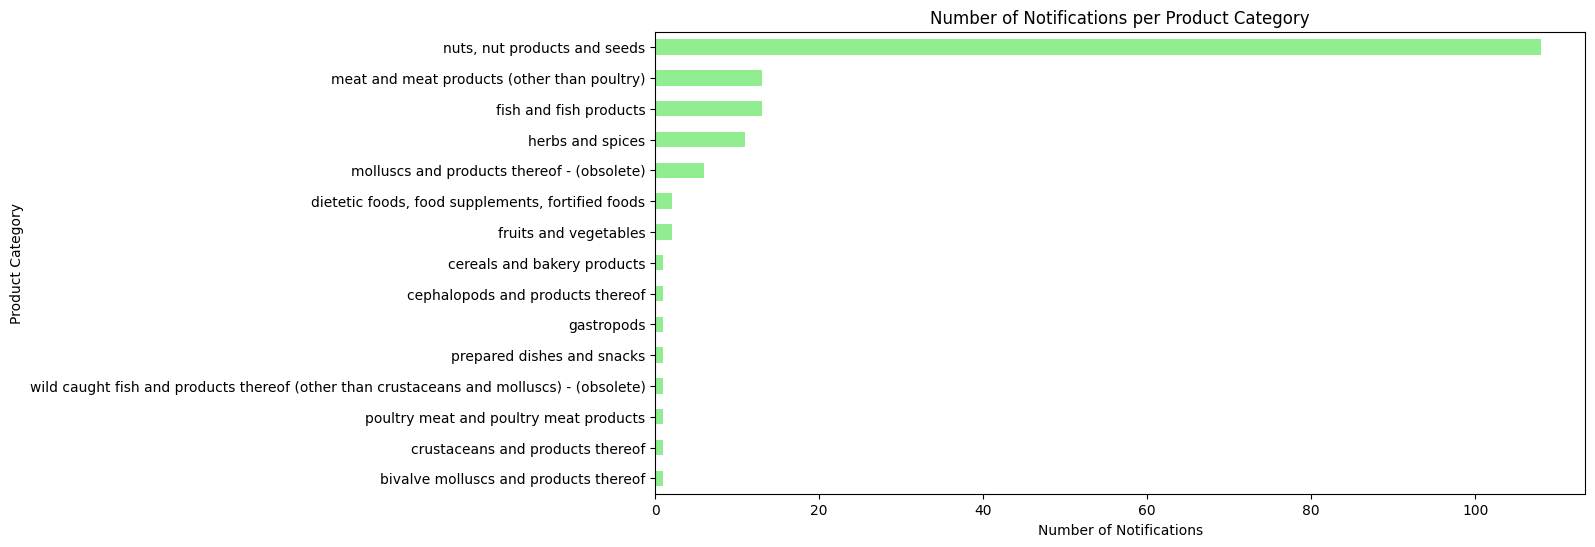

In [71]:
# Counting notifications per Product category
product_counts = df['Product category'].value_counts()

# Visualize the counts using a horizontal bar chart for clarity
plt.figure(figsize=(12,6))
product_counts.plot(kind='barh', color='lightgreen')
plt.title('Number of Notifications per Product Category')
plt.xlabel('Number of Notifications')
plt.ylabel('Product Category')
plt.gca().invert_yaxis()  # To display the highest count at the top
plt.show()


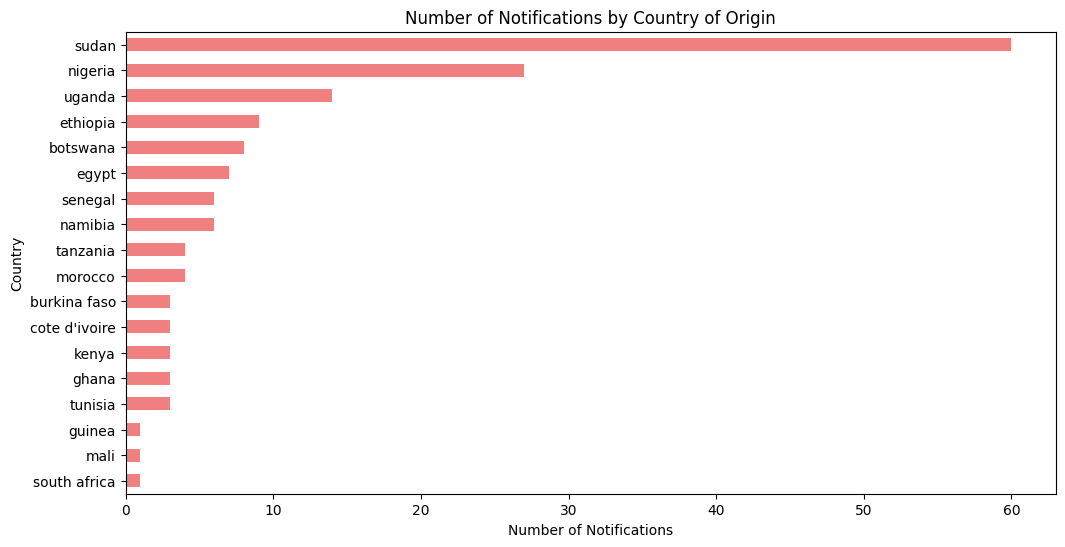

In [73]:
# Counting notifications per Country of origin
country_counts = df['Country of origin'].value_counts()

# Visualize the counts using a horizontal bar chart
plt.figure(figsize=(12,6))
country_counts.plot(kind='barh', color='lightcoral')
plt.title('Number of Notifications by Country of Origin')
plt.xlabel('Number of Notifications')
plt.ylabel('Country')
plt.gca().invert_yaxis()  # Highest count at the top
plt.show()

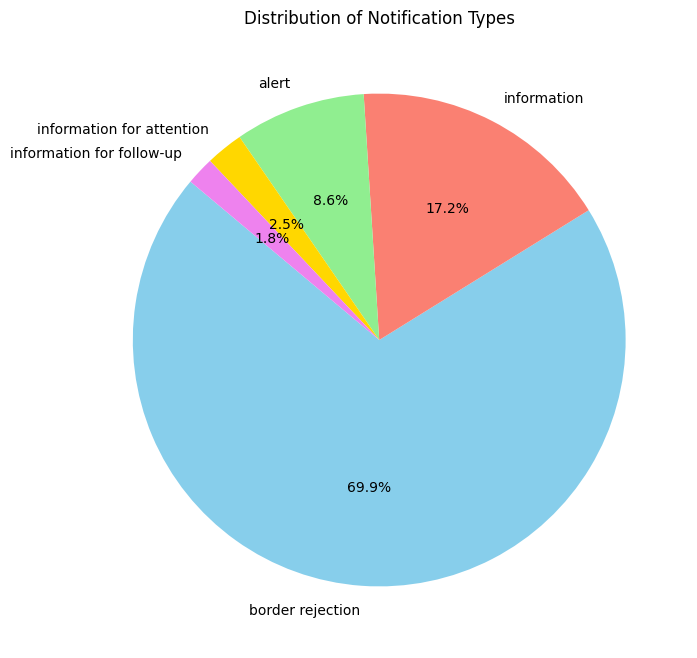

In [74]:
# Counting notifications by Notification type
notification_type_counts = df['Notification type'].value_counts()


# Visualizing the counts using a pie chart
plt.figure(figsize=(8,8))
notification_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue','salmon','lightgreen','gold','violet'])
plt.title('Distribution of Notification Types')
plt.ylabel('')  # Remove y-axis label for clarity
plt.show()


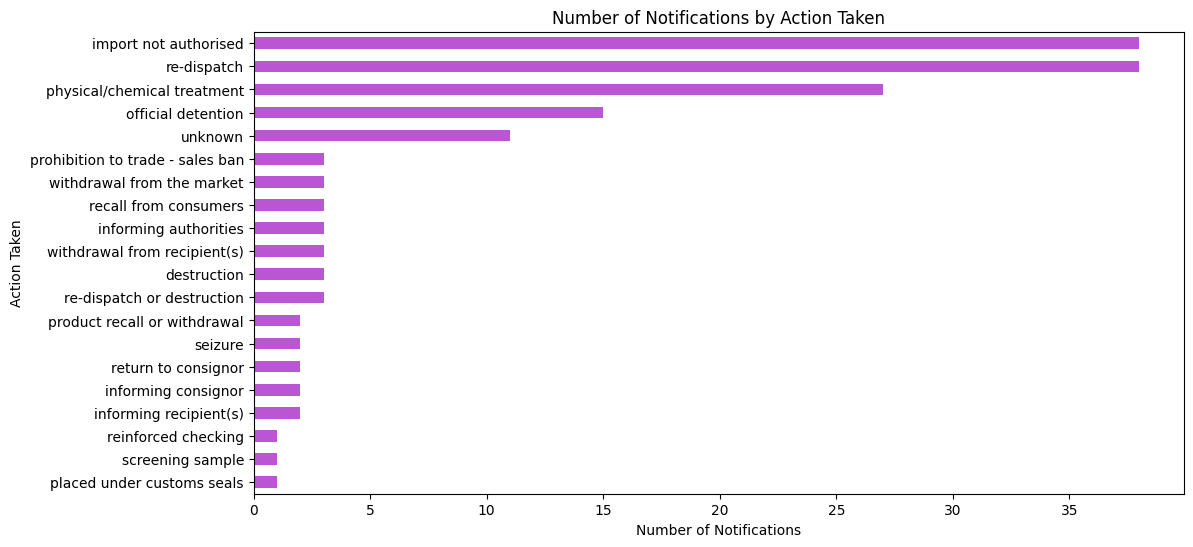

In [75]:
# Counting notifications by Action taken
action_counts = df['Action taken'].value_counts()


# Visualizing the counts using a horizontal bar chart for clarity
plt.figure(figsize=(12,6))
action_counts.plot(kind='barh', color='mediumorchid')
plt.title('Number of Notifications by Action Taken')
plt.xlabel('Number of Notifications')
plt.ylabel('Action Taken')
plt.gca().invert_yaxis()  # Highest count at the top
plt.show()


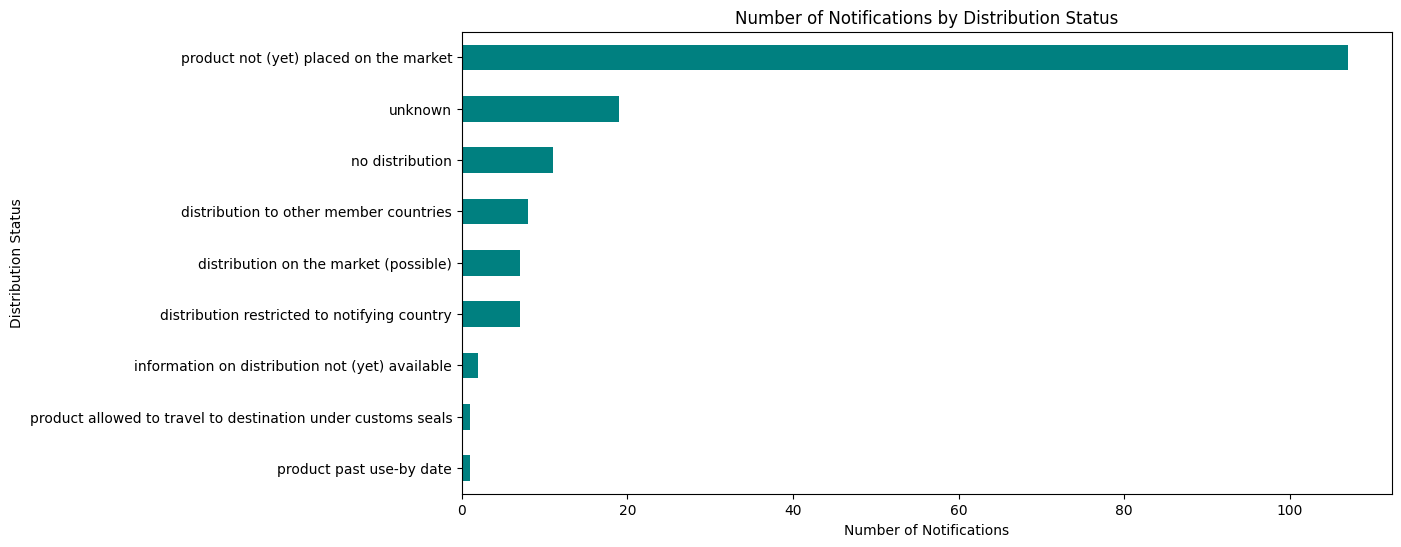

In [76]:
# Counting notifications by Distribution status
distribution_counts = df['Distribution status'].value_counts()

# Visualizing the counts using a horizontal bar chart
plt.figure(figsize=(12,6))
distribution_counts.plot(kind='barh', color='teal')
plt.title('Number of Notifications by Distribution Status')
plt.xlabel('Number of Notifications')
plt.ylabel('Distribution Status')
plt.gca().invert_yaxis()  # Highest count at the top
plt.show()


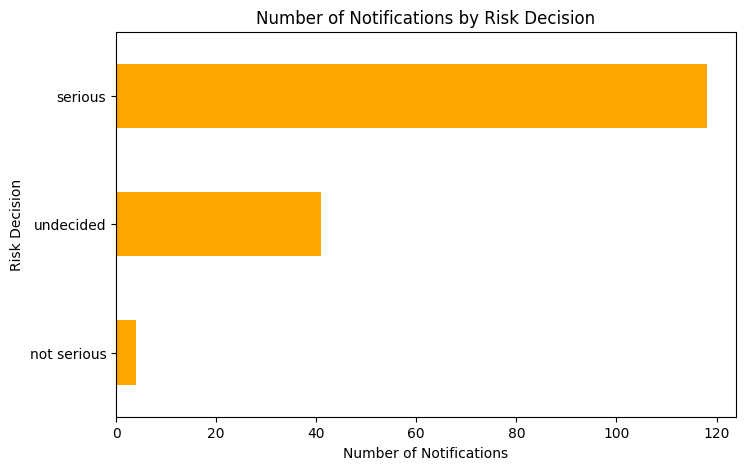

In [77]:
# Counting notifications by Risk decision
risk_decision_counts = df['Risk decision'].value_counts()

# Visualizing the counts using a horizontal bar chart
plt.figure(figsize=(8,5))
risk_decision_counts.plot(kind='barh', color='orange')
plt.title('Number of Notifications by Risk Decision')
plt.xlabel('Number of Notifications')
plt.ylabel('Risk Decision')
plt.gca().invert_yaxis()  # Highest count at the top
plt.show()


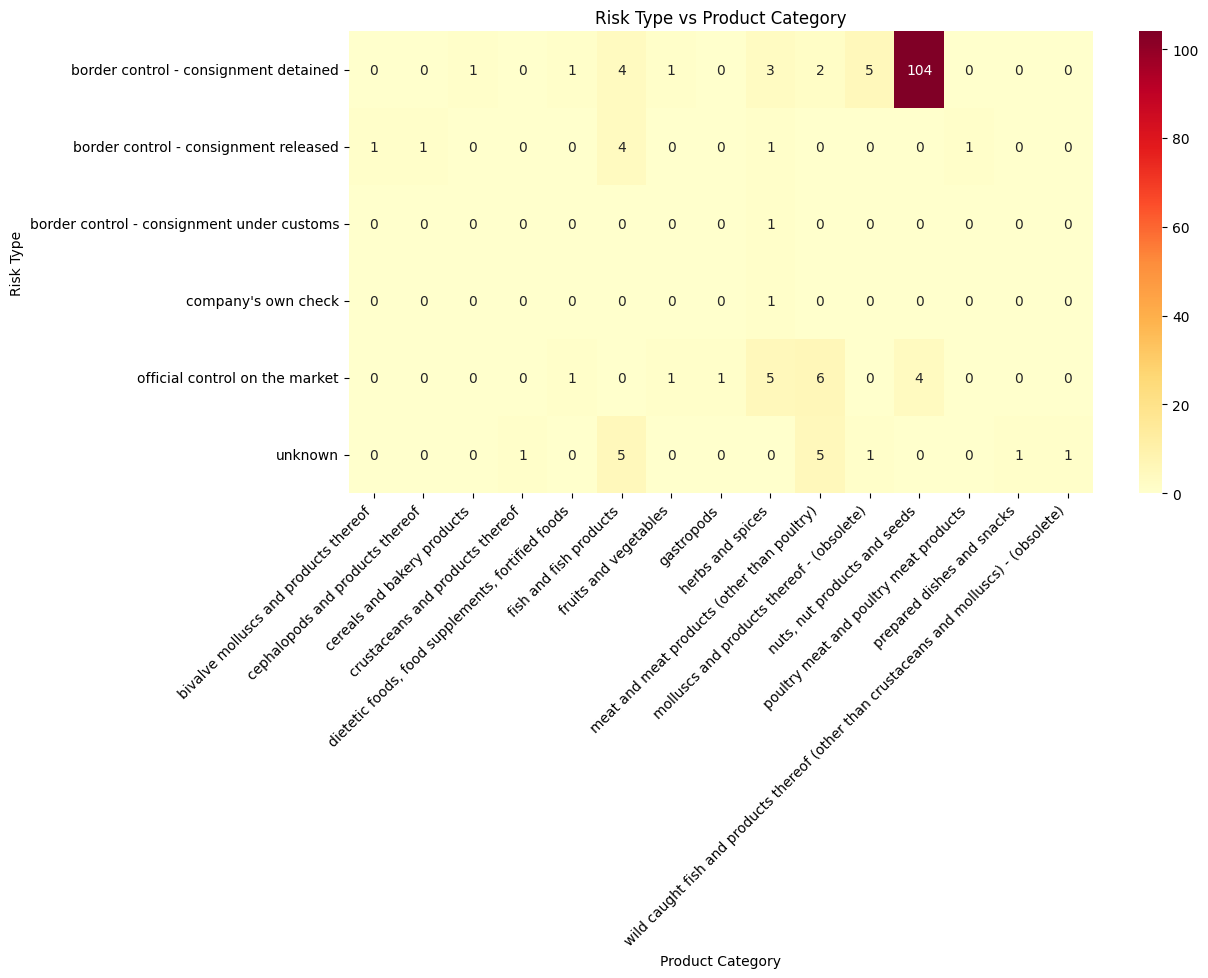

In [86]:
# Cross-tabulation of Risk type vs Product category
risk_product_crosstab = pd.crosstab(df['Risk'], df['Product category'])

# Visualizing the crosstab using a heatmap

plt.figure(figsize=(12,6))
sns.heatmap(risk_product_crosstab, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Risk Type vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Risk Type')
plt.xticks(rotation=45, ha='right')
plt.show()


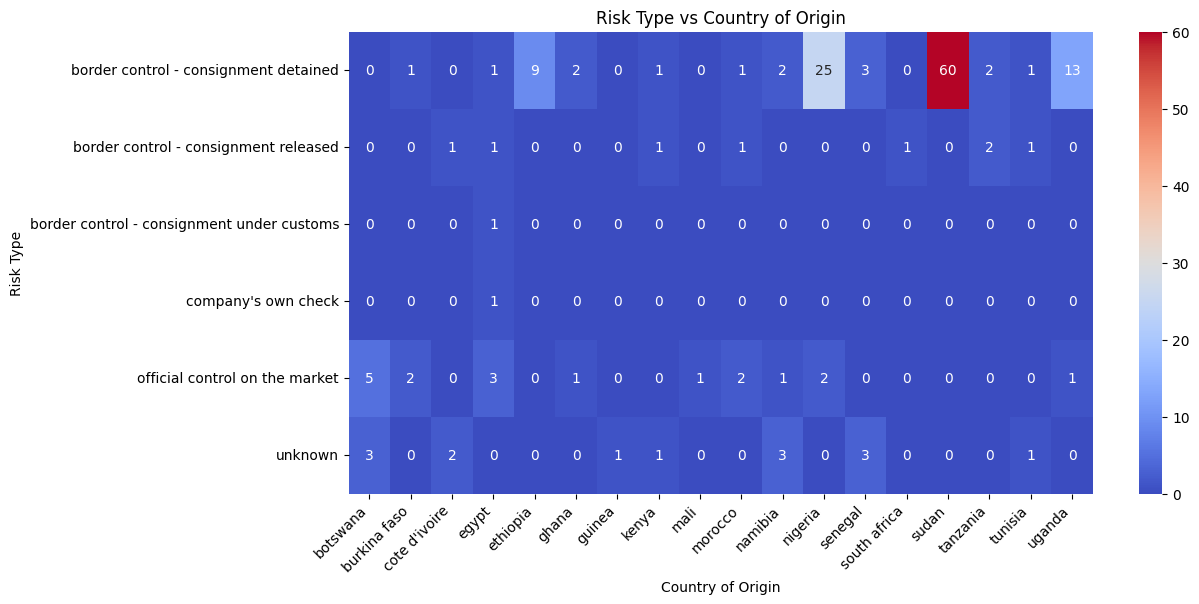

In [79]:
# Cross-tabulation of Risk type vs Country of origin
risk_country_crosstab = pd.crosstab(df['Risk'], df['Country of origin'])

# Visualizing the crosstab using a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(risk_country_crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Risk Type vs Country of Origin')
plt.xlabel('Country of Origin')
plt.ylabel('Risk Type')
plt.xticks(rotation=45, ha='right')
plt.show()


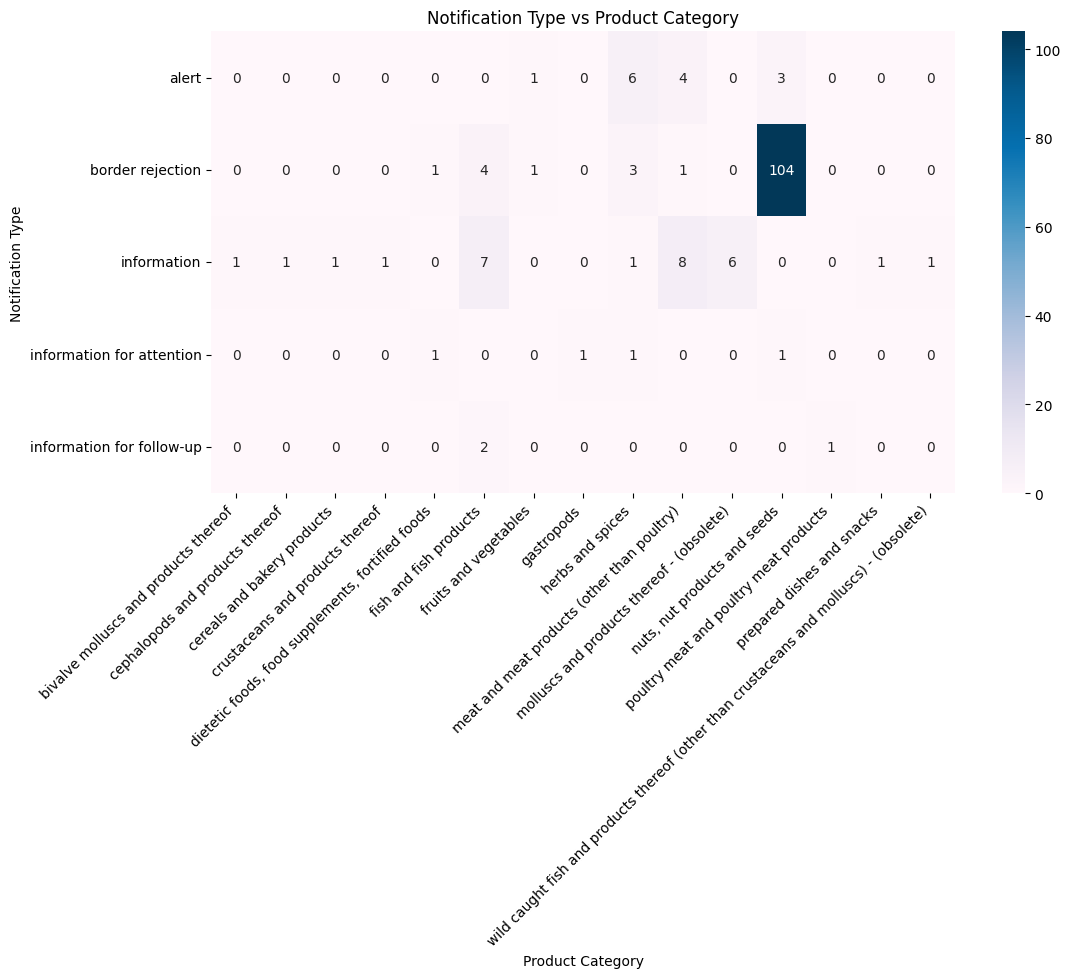

In [80]:
# Cross-tabulation of Notification type vs Product category
notif_product_crosstab = pd.crosstab(df['Notification type'], df['Product category'])

# Visualizing the crosstab using a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(notif_product_crosstab, annot=True, fmt='d', cmap='PuBu')
plt.title('Notification Type vs Product Category')
plt.xlabel('Product Category')
plt.ylabel('Notification Type')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_23288\1933062703.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

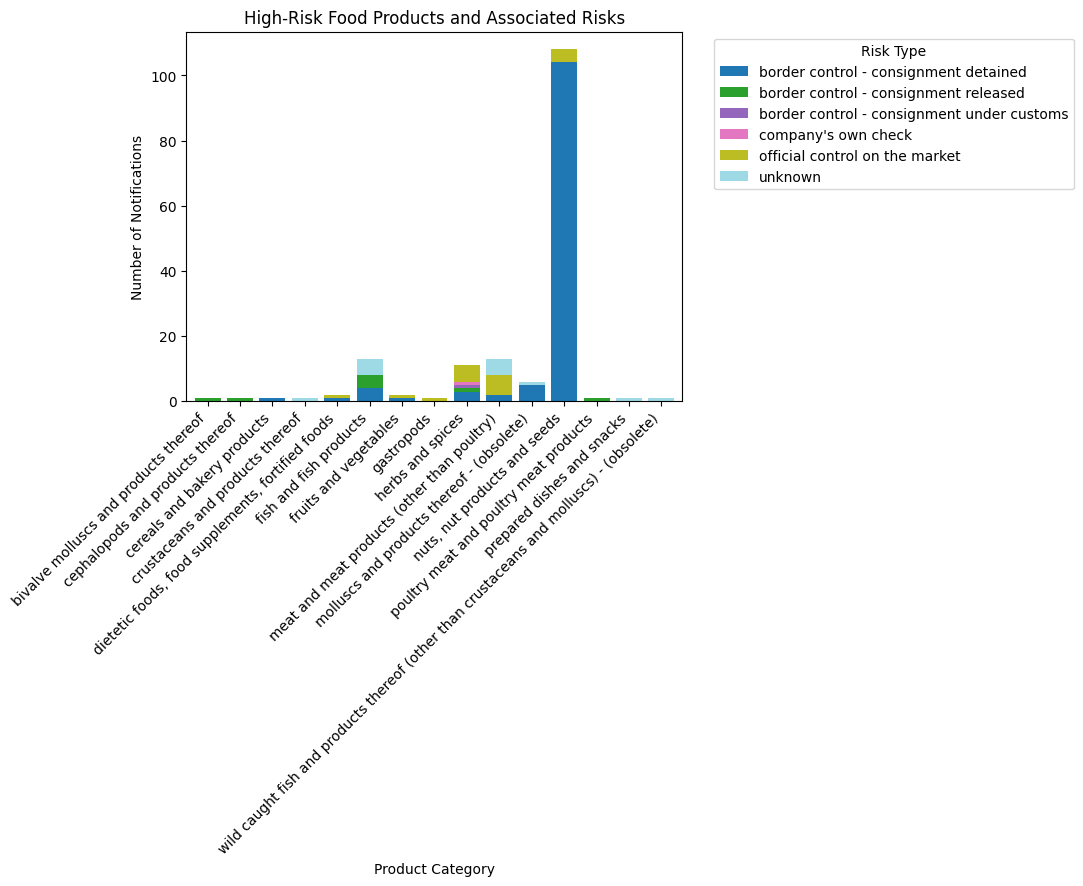

In [90]:
# Stacked bar chart of Risk type counts per Product category
risk_product_counts = pd.crosstab(df['Product category'], df['Risk'])

# Plot the stacked bar chart
plt.figure(figsize=(14,7))
risk_product_counts.plot(kind='bar', stacked=True, colormap='tab20', width=0.8)
plt.title('High-Risk Food Products and Associated Risks')
plt.xlabel('Product Category')
plt.ylabel('Number of Notifications')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [87]:
# Summary of key insights: top categories, top risks, top countries
summary = pd.DataFrame({
    'Top Product Category': [df['Product category'].value_counts().idxmax()],
    'Top Notification Type': [df['Notification type'].value_counts().idxmax()],
    'Top Risk Type': [df['Risk'].value_counts().idxmax()],
    'Top Country of Origin': [df['Country of origin'].value_counts().idxmax()],
    'Most Common Action Taken': [df['Action taken'].value_counts().idxmax()],
    'Most Common Distribution Status': [df['Distribution status'].value_counts().idxmax()],
    'Most Common Risk Decision': [df['Risk decision'].value_counts().idxmax()]
})

summary


,Top Product Category,Top Notification Type,Top Risk Type,Top Country of Origin,Most Common Action Taken,Most Common Distribution Status,Most Common Risk Decision
0,"nuts, nut products and seeds",border rejection,border control - consignment detained,sudan,import not authorised,product not (yet) placed on the market,serious


In [92]:
# Top 3 product categories
top_products = df['Product category'].value_counts().head(3)

In [93]:
# Top 3 countries of origin
top_countries = df['Country of origin'].value_counts().head(3)

In [94]:
# Display enhanced summary
print("Top 3 Product Categories at Highest Risk:\n", top_products)
print("\nTop 3 Countries of Origin contributing to risk:\n", top_countries)


Top 3 Product Categories at Highest Risk:
 Product category
nuts, nut products and seeds                   108
meat and meat products (other than poultry)     13
fish and fish products                          13
Name: count, dtype: int64

Top 3 Countries of Origin contributing to risk:
 Country of origin
sudan      60
nigeria    27
uganda     14
Name: count, dtype: int64


In [95]:
# ===============================
# HiCi Ltd EU Food Export Analysis - Summary Report
# ===============================

# Import necessary libraries (if not already imported)
import pandas as pd

# Display Key Summary Table
summary = pd.DataFrame({
    'Top Product Category': [df['Product category'].value_counts().idxmax()],
    'Top Notification Type': [df['Notification type'].value_counts().idxmax()],
    'Top Risk Type': [df['Risk'].value_counts().idxmax()],
    'Top Country of Origin': [df['Country of origin'].value_counts().idxmax()],
    'Most Common Action Taken': [df['Action taken'].value_counts().idxmax()],
    'Most Common Distribution Status': [df['Distribution status'].value_counts().idxmax()],
    'Most Common Risk Decision': [df['Risk decision'].value_counts().idxmax()]
})

print("=== Key Summary Table ===")
display(summary)

# Additional Insights: Top 3 Product Categories at Highest Risk
top3_products = df['Product category'].value_counts().head(3)
print("\nTop 3 Product Categories at Highest Risk:")
display(top3_products)

# Top 3 Countries of Origin contributing to risk
top3_countries = df['Country of origin'].value_counts().head(3)
print("\nTop 3 Countries of Origin contributing to risk:")
display(top3_countries)

# Recommendations for HiCi Ltd Management
recommendations = [
    "Focus export strategy on products with lower historical risk (e.g., herbs, fruits, cereals).",
    "Implement stricter quality checks for high-risk products (nuts, meat, fish).",
    "Prioritize compliance training and documentation for shipments from Sudan, Nigeria, and Uganda.",
    "Plan mitigation strategies for common actions taken (import not authorised, re-dispatch).",
    "Monitor notifications by EU country, especially Greece, Poland, Germany, and Norway."
]

print("\n=== Recommendations for HiCi Ltd ===")
for i, rec in enumerate(recommendations, start=1):
    print(f"{i}. {rec}")


=== Key Summary Table ===


,Top Product Category,Top Notification Type,Top Risk Type,Top Country of Origin,Most Common Action Taken,Most Common Distribution Status,Most Common Risk Decision
0,"nuts, nut products and seeds",border rejection,border control - consignment detained,sudan,import not authorised,product not (yet) placed on the market,serious



Top 3 Product Categories at Highest Risk:


Product category
nuts, nut products and seeds                   108
meat and meat products (other than poultry)     13
fish and fish products                          13
Name: count, dtype: int64


Top 3 Countries of Origin contributing to risk:


Country of origin
sudan      60
nigeria    27
uganda     14
Name: count, dtype: int64


=== Recommendations for HiCi Ltd ===
1. Focus export strategy on products with lower historical risk (e.g., herbs, fruits, cereals).
2. Implement stricter quality checks for high-risk products (nuts, meat, fish).
3. Prioritize compliance training and documentation for shipments from Sudan, Nigeria, and Uganda.
4. Plan mitigation strategies for common actions taken (import not authorised, re-dispatch).
5. Monitor notifications by EU country, especially Greece, Poland, Germany, and Norway.
